Step 1. 이것만큼은 꼭 해보세요!  
프로젝트에 정답은 없습니다. 배우신 내용을 토대로 자유롭게 데이터를 정제하고 변환하되, 아래 내용만큼은 반드시 실습해봅시다.

1. cars.csv와 brand.csv의 데이터 합치기  
[힌트] cars.csv의 title 변수로부터 브랜드 데이터를 추출할 수 있습니다.  

2. 카테고리형 변수를 숫자 형태로 변환하기  
[힌트] Engine, Emission Class 변수에 주목하세요!  

3. 결측치 처리하기  
[힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.  

4. Scaler 활용해보기  

5. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)  

In [219]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [157]:
car = pd.read_csv('cars.csv')
brand = pd.read_csv('brand.csv')

In [158]:
car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [159]:
brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [160]:
car['title'].unique()

array(['SKODA FABIA', 'VAUXHALL CORSA', 'HYUNDAI I30', 'MINI HATCH',
       'HYUNDAI COUPE', 'FORD FOCUS', 'VOLVO 740', 'PEUGEOT 207',
       'FORD FIESTA', 'VAUXHALL INSIGNIA', 'BMW 3 SERIES', 'CITROEN C1',
       'CITROEN C4', 'VAUXHALL ASTRA', 'FORD MONDEO',
       'MERCEDES-BENZ A180', 'PEUGEOT 407', 'FORD KA',
       'MERCEDES-BENZ A CLASS', 'MAZDA MAZDA2', 'SAAB 9-3',
       'VOLKSWAGEN POLO', 'BMW 1 SERIES', 'HONDA ACCORD',
       'VOLKSWAGEN BEETLE', 'MG MG6', 'FORD C-MAX', 'HONDA CIVIC',
       'TOYOTA AURIS', 'VOLVO S40', 'SEAT IBIZA', 'PEUGEOT 308',
       'VAUXHALL MERIVA', 'MERCEDES-BENZ B CLASS', 'MAZDA MAZDA3',
       'NISSAN 350 Z', 'ALFA ROMEO MITO', 'RENAULT FLUENCE',
       'VOLKSWAGEN PASSAT', 'KIA SPORTAGE', 'CITROEN XM',
       'VAUXHALL ANTARA', 'NISSAN NOTE', 'BMW 5 SERIES', 'HONDA CR-V',
       'PROTON SAVVY', 'NISSAN MICRA', 'FIAT PANDA', 'RENAULT MEGANE',
       'RENAULT CLIO', 'HYUNDAI I20', 'CITROEN C3', 'AUDI A6 SALOON',
       'TOYOTA YARIS', 'FIAT 500', 

In [161]:
brand['title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

In [162]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [163]:
car.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
dtype: float64

In [164]:
car.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [165]:
brand.isna().agg(['sum','mean']) 
#이상 없음

,title,country
sum,0.0,0.0
mean,0.0,0.0


### 1. cars.csv와 brand.csv의 데이터 합치기  

[힌트] cars.csv의 title 변수로부터 브랜드 데이터를 추출할 수 있습니다.

In [166]:
car['title'] = car['title'].str.lower() # 소문자로 전환

In [167]:
car['title'] = car['title'].str.split(' ').apply(lambda x : x[0]) 
# car [0]부분만 잡아서 브랜드로 나누어주기

In [168]:
car_merge = car.merge(brand, on = 'title', how = 'left')
#title 기준으로 병합해주기()
car_merge.head(3)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea


# 2. 카테고리형 변수를 숫자 형태로 변환하기  

[힌트] Engine, Emission Class 변수에 주목하세요!  

In [169]:
#혹시모르니 카피해서 해보자
car1 = car_merge.copy()
car1

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,France
3683,audi,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3684,bmw,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3685,honda,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,Japan


In [170]:
car1.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
country              0.000000
dtype: float64

In [171]:
#결측치를 지워버리자 Engine과 Emission Class 동시에 null값인 데이터가 많다.
# car1[car['Emission Class'].isna()]
# car1[car['Engine'].isna()]
car1 = car1.dropna(subset = ['Engine','Emission Class'])
#완료

In [172]:
#seats 결측도 없애버리자
#doos의 결측치도 같이 사라진다.
car1 = car1.dropna(subset = ['Seats'])

In [173]:
car1 = pd.get_dummies(car1, columns=['Engine','Emission Class'])


In [174]:
car1.isna().mean()

title                    0.000000
Price                    0.000000
Mileage(miles)           0.000000
Registration_Year        0.000000
Previous Owners          0.376844
Fuel type                0.000000
Body type                0.000000
Gearbox                  0.000000
Doors                    0.000000
Seats                    0.000000
Service history          0.851378
country                  0.000000
Engine_0.8L              0.000000
Engine_0.9L              0.000000
Engine_1.0L              0.000000
Engine_1.1L              0.000000
Engine_1.2L              0.000000
Engine_1.3L              0.000000
Engine_1.4L              0.000000
Engine_1.5L              0.000000
Engine_1.6L              0.000000
Engine_1.7L              0.000000
Engine_1.8L              0.000000
Engine_1.9L              0.000000
Engine_2.0L              0.000000
Engine_2.1L              0.000000
Engine_2.2L              0.000000
Engine_2.3L              0.000000
Engine_2.4L              0.000000
Engine_2.5L   

bool값을 뜨는데 상관이 없는가 ...?  
없다. bool값도 결국 0과 1이다.

# 3. 결측치 처리하기  
[힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.  

[TIP] 결측치 수치 확인하기 

결측치 비율	처리 방법  
10% 이하 :  
fillna()로 채우는 것이 일반적  
10~30% :  
상황에 따라 fillna() 또는 dropna() 결정  
30~50% :  
중요하지 않다면 dropna()로 삭제 추천  
50% 이상 :  
대부분 삭제하는 것이 일반적  

In [175]:
car1['Service history'] = car['Service history'].replace({np.nan:'Unknown'})
# NaN은 numpy를 이용해라! 기억하기

In [176]:
car1.isna().mean() 
#0.382696의 수치를 가진 Previous Owners 행은 과감하게 삭제를 해보자

title                    0.000000
Price                    0.000000
Mileage(miles)           0.000000
Registration_Year        0.000000
Previous Owners          0.376844
Fuel type                0.000000
Body type                0.000000
Gearbox                  0.000000
Doors                    0.000000
Seats                    0.000000
Service history          0.000000
country                  0.000000
Engine_0.8L              0.000000
Engine_0.9L              0.000000
Engine_1.0L              0.000000
Engine_1.1L              0.000000
Engine_1.2L              0.000000
Engine_1.3L              0.000000
Engine_1.4L              0.000000
Engine_1.5L              0.000000
Engine_1.6L              0.000000
Engine_1.7L              0.000000
Engine_1.8L              0.000000
Engine_1.9L              0.000000
Engine_2.0L              0.000000
Engine_2.1L              0.000000
Engine_2.2L              0.000000
Engine_2.3L              0.000000
Engine_2.4L              0.000000
Engine_2.5L   

In [177]:
car1.drop(columns=['Previous Owners'],inplace=True) 
#과감하게 삭제해버리기
#뭔가 잘못됐었던것 같다.
#car1.isna().sum()이 inplace=True를 하니까 잘 적용됐다. 

In [178]:
car1.head()

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Gearbox,Doors,Seats,Service history,...,Engine_4.8L,Engine_5.0L,Engine_5.5L,Engine_6.3L,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
0,skoda,6900,70189,2016,Diesel,Hatchback,Manual,5.0,5.0,Unknown,...,False,False,False,False,False,False,False,False,False,True
1,vauxhall,1495,88585,2008,Petrol,Hatchback,Manual,3.0,5.0,Full,...,False,False,False,False,False,False,False,True,False,False
2,hyundai,949,137000,2011,Petrol,Hatchback,Manual,5.0,5.0,Unknown,...,False,False,False,False,False,False,False,False,True,False
3,mini,2395,96731,2010,Petrol,Hatchback,Manual,3.0,4.0,Full,...,False,False,False,False,False,False,False,True,False,False
4,vauxhall,1000,85000,2013,Diesel,Hatchback,Manual,5.0,5.0,Unknown,...,False,False,False,False,False,False,False,False,True,False


In [179]:
car1.isna().sum()

title                    0
Price                    0
Mileage(miles)           0
Registration_Year        0
Fuel type                0
Body type                0
Gearbox                  0
Doors                    0
Seats                    0
Service history          0
country                  0
Engine_0.8L              0
Engine_0.9L              0
Engine_1.0L              0
Engine_1.1L              0
Engine_1.2L              0
Engine_1.3L              0
Engine_1.4L              0
Engine_1.5L              0
Engine_1.6L              0
Engine_1.7L              0
Engine_1.8L              0
Engine_1.9L              0
Engine_2.0L              0
Engine_2.1L              0
Engine_2.2L              0
Engine_2.3L              0
Engine_2.4L              0
Engine_2.5L              0
Engine_2.6L              0
Engine_2.7L              0
Engine_2.8L              0
Engine_3.0L              0
Engine_3.1L              0
Engine_3.2L              0
Engine_3.3L              0
Engine_3.5L              0
E

# 4. Scaler 활용해보기  

무슨소리일까... 스케일링은 ...

In [180]:
#공식활용 해보기
#corr()은 피어슨상관관계를 이용한다.
#car.corr()은 문자가 많아서 오류가 난다!
#object 타입(문자열) 컬럼을 제외한 후 실행해보자 
car_numeric = car1.select_dtypes(include=['number'])
car_numeric.corr() 
#Price와 Registration_Year 은 0.722971로 비례관계 
#Price와 Mileage(miles) -0.500358 반비례관계 

,Price,Mileage(miles),Registration_Year,Doors,Seats
Price,1.000000,-0.503532,0.785830,0.113589,-0.024941
Mileage(miles),-0.503532,1.000000,-0.445112,-0.032997,0.095246
Registration_Year,0.785830,-0.445112,1.000000,0.213366,0.026654
Doors,0.113589,-0.032997,0.213366,1.000000,0.498437
Seats,-0.024941,0.095246,0.026654,0.498437,1.000000


In [181]:
#SS
(car_numeric['Price'] - car_numeric['Price'].mean()) / car_numeric['Price'].std()

0       0.245436
1      -0.951667
2      -1.072596
3      -0.752335
4      -1.061300
          ...   
3682   -0.973815
3683    0.265369
3684   -0.397966
3685   -0.974923
3686   -0.839820
Name: Price, Length: 3593, dtype: float64

In [182]:
#SS
#아 이렇게도 되는구나 
(car_numeric - car_numeric.mean()) / car_numeric.std()

,Price,Mileage(miles),Registration_Year,Doors,Seats
0,0.245436,-0.286338,0.853403,0.690802,0.176075
1,-0.951667,0.178897,-0.833914,-1.337018,0.176075
2,-1.072596,1.403311,-0.201170,0.690802,0.176075
3,-0.752335,0.384909,-0.412085,-1.337018,-1.561944
4,-1.061300,0.088232,0.220659,0.690802,0.176075
...,...,...,...,...,...
3682,-0.973815,-0.134269,-1.255743,0.690802,0.176075
3683,0.265369,0.948091,0.009744,-0.323108,0.176075
3684,-0.397966,1.453891,0.220659,-0.323108,0.176075
3685,-0.974923,2.470295,-1.044829,0.690802,0.176075


In [183]:
#RS
(car_numeric['Price'] - car_numeric['Price'].quantile(0.5)) / (car_numeric['Price'].quantile(0.75) - car_numeric['Price'].quantile(0.25))

0       0.526593
1      -0.454529
2      -0.553639
3      -0.291160
4      -0.544382
          ...   
3682   -0.472681
3683    0.542930
3684   -0.000726
3685   -0.473589
3686   -0.362861
Name: Price, Length: 3593, dtype: float64

In [184]:
#MM
(car_numeric['Price'] - car_numeric['Price'].min()) / (car_numeric['Price'].max() - car_numeric['Price'].min())

0       0.194030
1       0.032687
2       0.016388
3       0.059552
4       0.017910
          ...   
3682    0.029701
3683    0.196716
3684    0.107313
3685    0.029552
3686    0.047761
Name: Price, Length: 3593, dtype: float64

In [185]:
#라이브러리를 이용해보자
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [186]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [187]:
#ss
ss.fit(car_numeric) # 학습시키기

StandardScaler()

In [188]:
# ss.transform(car_numeric) array 형태 ..? 이게 numpy 값
# pd.DataFrame(ss.transform(car_numeric)) #데이터프레임으로 바꾸기
ss_df = pd.DataFrame(ss.transform(car_numeric),columns=car_numeric.columns)
# 열에 이름 넣어주기

In [189]:
#rs
rs.fit(car_numeric)

RobustScaler()

In [190]:
pd.DataFrame(rs.transform(car_numeric),columns=car_numeric.columns)

,Price,Mileage(miles),Registration_Year,Doors,Seats
0,0.526593,-0.212751,0.500,0.0,0.0
1,-0.454529,0.186165,-0.500,-1.0,0.0
2,-0.553639,1.236040,-0.125,0.0,0.0
3,-0.291160,0.362810,-0.250,-1.0,-1.0
4,-0.544382,0.108425,0.125,0.0,0.0
...,...,...,...,...,...
3588,-0.472681,-0.082359,-0.750,0.0,0.0
3589,0.542930,0.845712,0.000,-0.5,0.0
3590,-0.000726,1.279410,0.125,-0.5,0.0
3591,-0.473589,2.150927,-0.625,0.0,0.0


In [191]:
#mm fit_transform 이용하기
pd.DataFrame(mm.fit_transform(car_numeric),columns=car_numeric.columns)

,Price,Mileage(miles),Registration_Year,Doors,Seats
0,0.194030,0.063227,0.766667,1.000000,0.6
1,0.032687,0.079798,0.500000,0.333333,0.6
2,0.016388,0.123412,0.600000,1.000000,0.6
3,0.059552,0.087136,0.566667,0.333333,0.4
4,0.017910,0.076569,0.666667,1.000000,0.6
...,...,...,...,...,...
3588,0.029701,0.068643,0.433333,1.000000,0.6
3589,0.196716,0.107197,0.633333,0.666667,0.6
3590,0.107313,0.125213,0.666667,0.666667,0.6
3591,0.029552,0.161417,0.466667,1.000000,0.6


In [192]:
ss_df.describe()
#뭔말인지 모른다 뭘 의미하는지 모른다.. 어렵다..

,Price,Mileage(miles),Registration_Year,Doors,Seats
count,3.593000e+03,3.593000e+03,3.593000e+03,3.593000e+03,3.593000e+03
mean,-1.265648e-16,1.740266e-16,3.480532e-16,1.582060e-17,6.575437e-16
std,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00
min,-1.194355e+00,-2.061677e+00,-3.998190e+00,-2.351255e+00,-5.038684e+00
25%,-7.313958e-01,-6.203781e-01,-8.340303e-01,-1.337204e+00,1.760999e-01
50%,-3.971350e-01,-3.822301e-02,9.745813e-03,6.908982e-01,1.760999e-01
75%,4.889109e-01,5.460315e-01,8.535219e-01,6.908982e-01,1.760999e-01
max,6.226280e+00,2.601661e+01,2.330130e+00,6.908982e-01,3.652623e+00


# 5. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)

In [193]:
from sklearn.decomposition import PCA

In [194]:
pca = PCA()

In [195]:
pca.fit(car_numeric) #학습

PCA()

In [196]:
pd.DataFrame(pca.transform(car_numeric),columns=car_numeric.columns) 

,Price,Mileage(miles),Registration_Year,Doors,Seats
0,-11367.375488,450.043392,-3.124224,-0.408562,0.101845
1,7310.981363,-3879.607636,0.592026,1.037441,-0.531846
2,55676.232929,-1618.462676,-3.363544,-0.466031,0.219838
3,15391.120504,-2508.961950,-0.734566,1.544301,0.390026
4,3760.699324,-4581.564628,-4.910258,-0.411052,0.141379
...,...,...,...,...,...
3588,-5045.404008,-4697.182968,2.448024,-0.999030,0.201333
3589,37356.346959,3369.066210,0.630061,0.294412,-0.167015
3590,57496.318603,1538.340739,-2.888927,0.518388,-0.157879
3591,97769.742009,1267.204350,0.642077,-0.716663,0.307638


In [197]:
pca2 = PCA(2)

In [198]:
pd.DataFrame(pca2.fit_transform(car_numeric),columns = ['PC1','PC2'])

,PC1,PC2
0,-11367.375488,450.043392
1,7310.981363,-3879.607636
2,55676.232929,-1618.462676
3,15391.120504,-2508.961950
4,3760.699324,-4581.564628
...,...,...
3588,-5045.404008,-4697.182968
3589,37356.346959,3369.066210
3590,57496.318603,1538.340739
3591,97769.742009,1267.204350


In [199]:
# pca2.explained_variance_ratio_ #이게 각자 하나당 손실률을 확인한다.
(pca2.explained_variance_ratio_).sum() # 합치면 데이터 손실률을 확인 할 수 있다.
#0.9999가 나온다. 손실이 없다. 사용가능하다
#하지만 PCA는 어떤 근거로 성분을 가지고 왔는지 잘 모른다 ... 어떻게 녹아들어가 있는지 잘모름


0.9999999938055217

Step 2. 이런것도 해볼 수 있어요!  
자유롭게 실습을 해보시고, 여유가 되면 아래의 내용도 실습해보세요.

국가별 총 브랜드 개수는?  
상관관계가 높은 변수들이 있는지 확인해보세요.  


# 지금도 실습은 뭘해야될지 잘 모르겠다..

In [200]:
#국가별 총 브랜드 개수는?
car_merge.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom


In [201]:
car_merge.loc[car_merge['country'] == 'South Korea'] 
#한국 브랜드 데이터 보여주기

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
5,hyundai,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN,South Korea
71,hyundai,1750,130000,2010,4.0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,South Korea
105,kia,10198,50028,2016,NaN,Petrol,SUV,1.6L,Manual,5.0,5.0,Euro 6,NaN,South Korea
117,kia,10198,50028,2016,NaN,Petrol,SUV,1.6L,Manual,5.0,5.0,Euro 6,NaN,South Korea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,hyundai,925,136000,2006,NaN,Diesel,Hatchback,1.5L,Manual,3.0,5.0,Euro 4,NaN,South Korea
3595,hyundai,990,121000,2003,4.0,Petrol,Hatchback,1.3L,Manual,5.0,5.0,Euro 3,NaN,South Korea
3628,hyundai,2945,88000,2012,3.0,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3646,kia,1995,100000,2012,5.0,Petrol,Hatchback,1.3L,Manual,3.0,5.0,Euro 5,NaN,South Korea


In [223]:
#한국 브랜드 이름 확인하기
car_merge.loc[car_merge['country'] == 'South Korea','title'].unique()  

array(['hyundai', 'kia', 'daewoo', 'ssangyong'], dtype=object)

In [224]:
#한국 브랜드 갯수 확인하기
car_merge.loc[car_merge['country'] == 'South Korea','title'].nunique() 

4

In [203]:
#국가별 총 브랜드 개수는?
car_merge.loc[car_merge['country'] == 'title'].nunique() 


title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
country              0
dtype: int64

In [204]:
# car_merge.groupby('country')['title'].unique()
car_merge.groupby('country')['title'].nunique()

country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             11
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     8
United States      5
Name: title, dtype: int64

In [205]:
car1.head()

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Gearbox,Doors,Seats,Service history,...,Engine_4.8L,Engine_5.0L,Engine_5.5L,Engine_6.3L,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
0,skoda,6900,70189,2016,Diesel,Hatchback,Manual,5.0,5.0,Unknown,...,False,False,False,False,False,False,False,False,False,True
1,vauxhall,1495,88585,2008,Petrol,Hatchback,Manual,3.0,5.0,Full,...,False,False,False,False,False,False,False,True,False,False
2,hyundai,949,137000,2011,Petrol,Hatchback,Manual,5.0,5.0,Unknown,...,False,False,False,False,False,False,False,False,True,False
3,mini,2395,96731,2010,Petrol,Hatchback,Manual,3.0,4.0,Full,...,False,False,False,False,False,False,False,True,False,False
4,vauxhall,1000,85000,2013,Diesel,Hatchback,Manual,5.0,5.0,Unknown,...,False,False,False,False,False,False,False,False,True,False


In [206]:
#간단하게 배출가스등급과 가격의 차이를 상관관계를 알아보자.
# 유로1~6 숫자가 높을수록 최신형임이 분명하다.
#어려우니 GPT와 함께해보자

car_emission = [x for x in car1.columns if 'Emission Class_' in x]

print(car1[car_emission + ['Price']].corr())

#그렇다 .
#다른건 몰라도 EURO 6 가 가장 비싸다는건 알 수 있다. 
#                                       Price
# Emission Class_Euro 1              -0.011243  
# Emission Class_Euro 2              -0.063703  
# Emission Class_Euro 3              -0.155523  
# Emission Class_Euro 4              -0.473329  
# Emission Class_Euro 5              -0.191574  
# Emission Class_Euro 6               0.741820  
# Price                               1.000000

                       Emission Class_Euro 1  Emission Class_Euro 2  \
Emission Class_Euro 1               1.000000              -0.001339   
Emission Class_Euro 2              -0.001339               1.000000   
Emission Class_Euro 3              -0.003322              -0.015981   
Emission Class_Euro 4              -0.010844              -0.052167   
Emission Class_Euro 5              -0.012232              -0.058843   
Emission Class_Euro 6              -0.011149              -0.053631   
Price                              -0.011243              -0.063703   

                       Emission Class_Euro 3  Emission Class_Euro 4  \
Emission Class_Euro 1              -0.003322              -0.010844   
Emission Class_Euro 2              -0.015981              -0.052167   
Emission Class_Euro 3               1.000000              -0.129401   
Emission Class_Euro 4              -0.129401               1.000000   
Emission Class_Euro 5              -0.145962              -0.476465   
Emiss

<Axes: xlabel='Emission Class', ylabel='Price'>

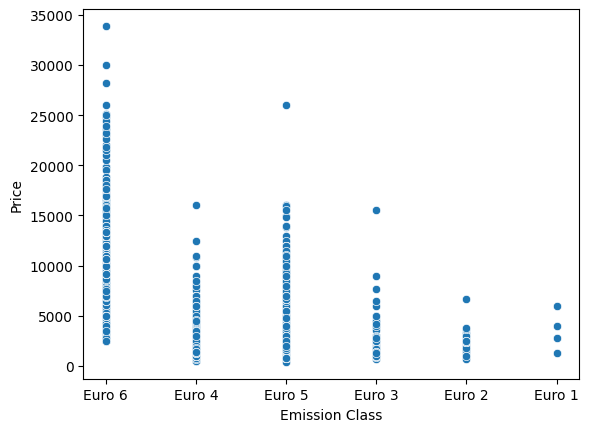

In [ ]:
#그렇다면 그래프에 도전해보자

sns.scatterplot(x=car_merge['Emission Class'],y=car_merge['Price'])

#막대그래프를 실행하니깐 설정이 잘못돼있어서 보기가 어려움 그래서 산점도로 표현했습니다.
#우하향그래프로 반비례 같지만 
#x축이 역순이기 때문에 x축만 바뀐다면 우상향그래프라고 표현할 수 있습니다.
#실력 이슈로 ... 지피티가 말해줘도 이해하지 못한건 사용할수없어요 ..


### 회고

책과 동영상을 두번 공부해서 그런지 두번째 LMS를 통해 이해가 잘 되었습니다.  
책에서 공부할 때는 머리속에도 안들어오는 기분에다가 그저 따라만해보자 0보단 1이 낫다라고 생각하며 진행을 했는데 LMS를 통해 강의를 들을 때는 저에게 1 그 이상이 남아있다는 걸 느꼈습니다. 그래서 집중도 잘 되었던 것 같습니다.
항상 승욱님이 강조하셨던 '알고만 있어라 이런게 있었다는 것만 알고 있고 나중에 사용할 때 정확한 방법은 GPT한테 물어보면 된다.'의 방식을 오늘 잘 사용했습니다.  
'어 그때 이거 배웠는데, 이거 사용하면 되겠다.'를 이번에 잘 활용 한 것 같습니다. 죽었다 깨어나도 모를거 같았는데 ... 이제 조금 알고나니 재미가 붙는거 같기도 합니다.

앞으로 갈길이 멀지만 계속해서 배우겠습니다.  
그리고 마지막으로 정말 스케일링과 PCA는 알겠는데 아직 언제 어디서 어떻게 쓰는지 모르는건 당연한거겠죠 ?

그리고 확실히 프로젝트/메인퀘스트가 재미가 있어요 ...힘이 난다랄까?
